# Bank marketing UCI EDA

### Attribute Information:

##### Bank client data:
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')

##### Related with the last contact of the current campaign:
* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### Other attributes:
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### Social and economic context attributes
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
def read_data(path: str, files: list):
    dataframes = []
    for file in files:
        dataframes.append(pd.read_csv(path + file, sep=';'))
    return dataframes


path = '../data/bank-additional/'
files = ['bank-additional-full.csv']
bank_data = read_data(path, files)[0]

### General

In [3]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.shape

(41188, 21)

* Datatypes

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* There bonth numerical and categorical features as stated in description

* Let's check missing values

In [6]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
bank_data[bank_data == 'unknown'].count()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

* No missing values, but 'unknown' values are present in dataset, will deal with them later

* Let's check duplicates and remove them if there are some

In [8]:
bank_data.duplicated().sum()

12

* Twelve duplicates, so let's remove them

In [9]:
bank_data.drop_duplicates(inplace=True)
bank_data.duplicated().sum()

0

In [10]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Distributions

In [11]:
def encode_bool(features, data):
    for feature in features:
        data[feature] = data[feature].map({'yes': 1, 'no': 0, 'unknown': 'unknown'})
    display(data.sample(5))

    
bool_features = ['default', 'housing', 'loan', 'y']
encode_bool(bool_features, bank_data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
11917,53,technician,divorced,university.degree,0,1,0,telephone,jun,fri,...,28,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
40759,19,student,single,basic.6y,0,1,1,cellular,sep,thu,...,5,13,1,success,-1.1,94.199,-37.5,0.879,4963.6,1
38974,48,admin.,married,high.school,unknown,0,1,cellular,dec,thu,...,1,8,1,success,-3.0,92.713,-33.0,0.720,5023.5,1
858,42,blue-collar,married,basic.6y,0,0,0,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,0
16467,44,technician,married,professional.course,0,0,0,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0


#### Categorical features

In [12]:
def create_countplot(feature, hue, fontsize, data):
    def place_percentage(patch, percentage, ax):
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_height() / 2
        ax.annotate(percentage, xy=(x, y), fontsize=fontsize, ha='center', va='center')
        

    sns.set(style="darkgrid")
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=feature, hue=hue, data=data)
    plt.title('{} distribution'.format(feature.capitalize()))
    for i in range(len(ax.patches) // 2):
        total = ax.patches[i].get_height() + ax.patches[i + len(ax.patches) // 2].get_height()
        place_percentage(ax.patches[i], '{:.1f}%'.format(100 * ax.patches[i].get_height() / total), ax)
        place_percentage(ax.patches[i + len(ax.patches) // 2], '{:.1f}%'.format(100 * ax.patches[i + len(ax.patches) // 2].get_height() / total), ax)
    plt.show()

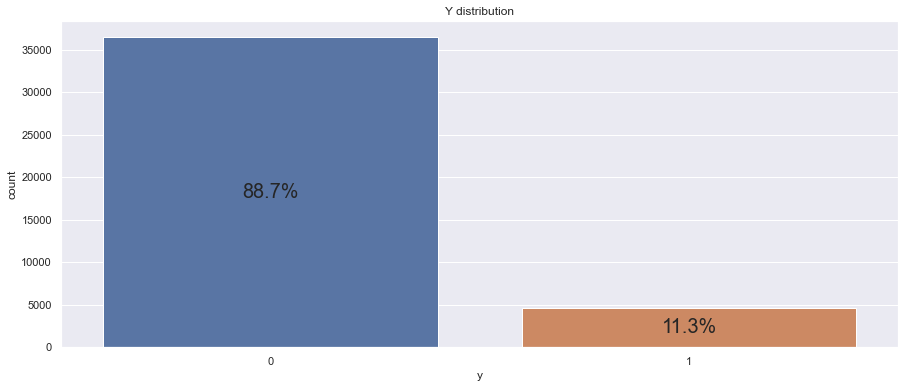

In [13]:
create_countplot(feature='y', hue=None, fontsize=20, data=bank_data)

* 'no' is prevailed value in target feature 'y'

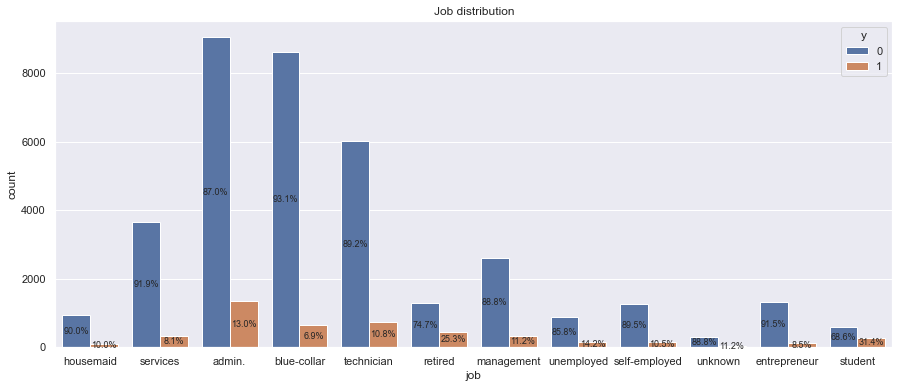

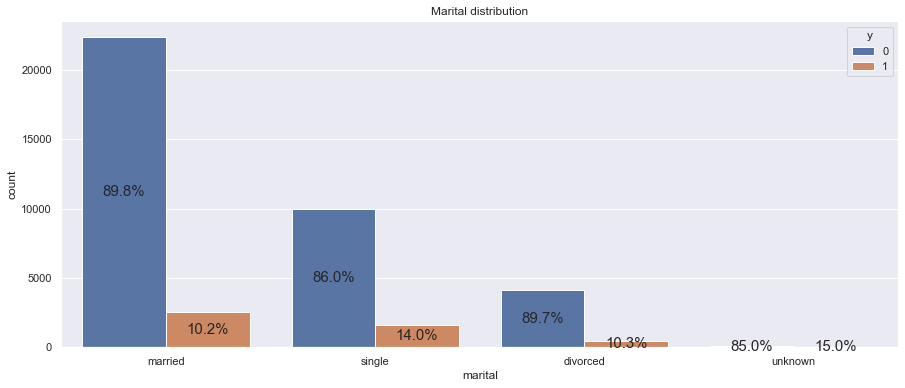

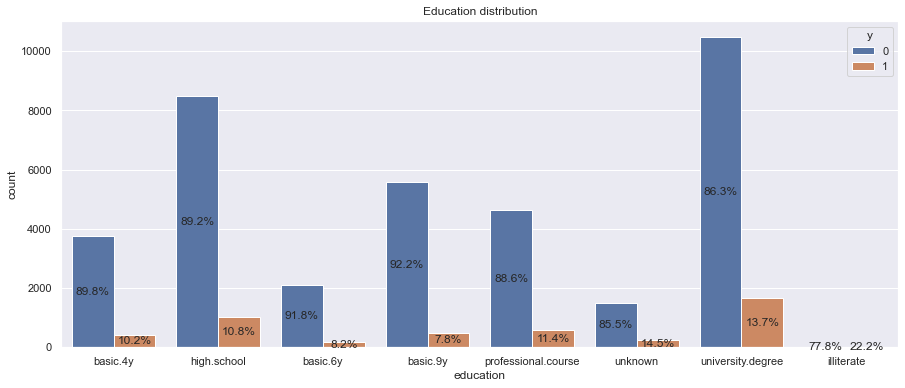

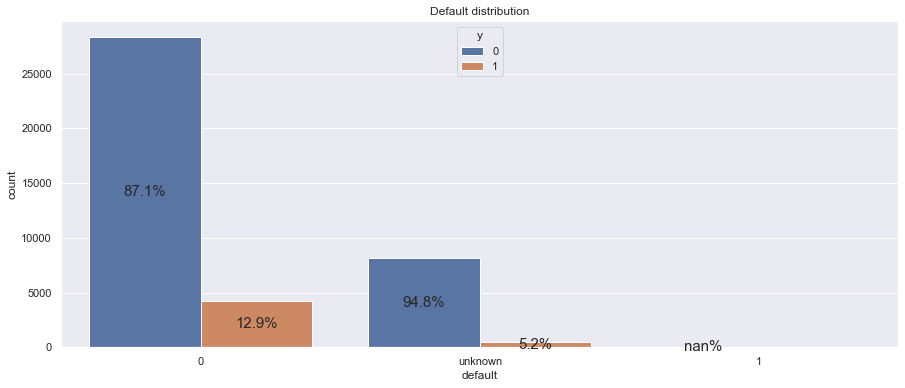

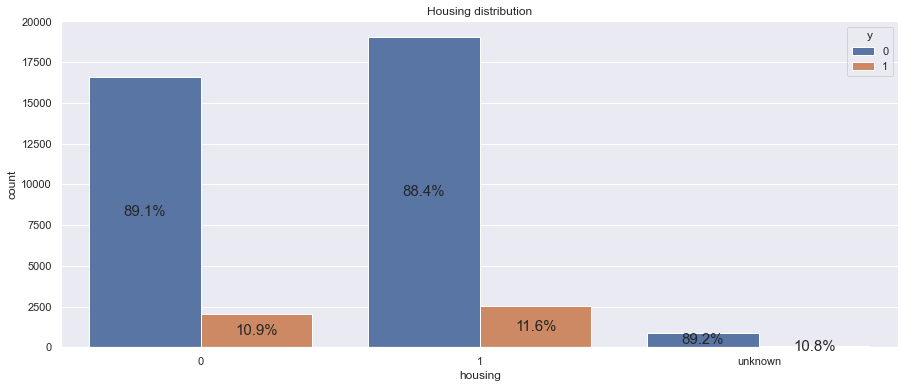

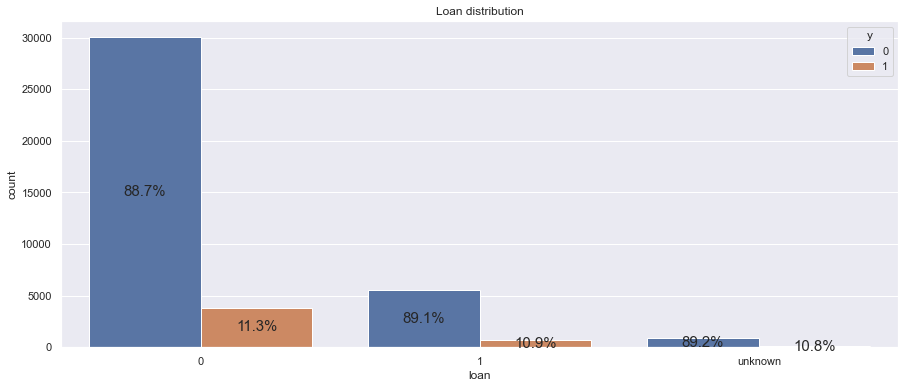

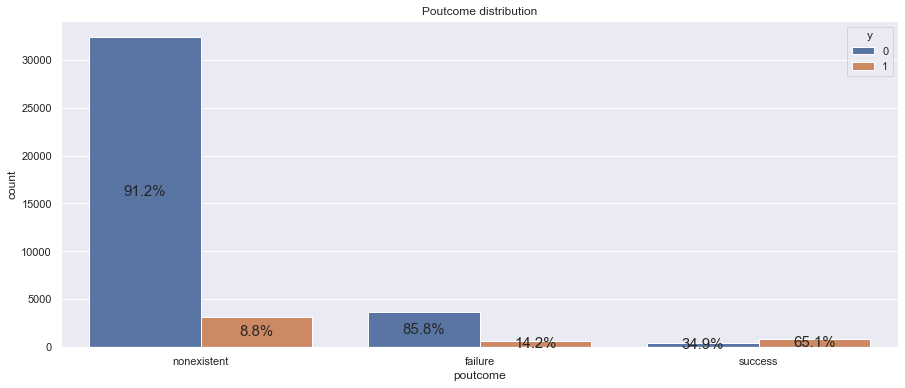

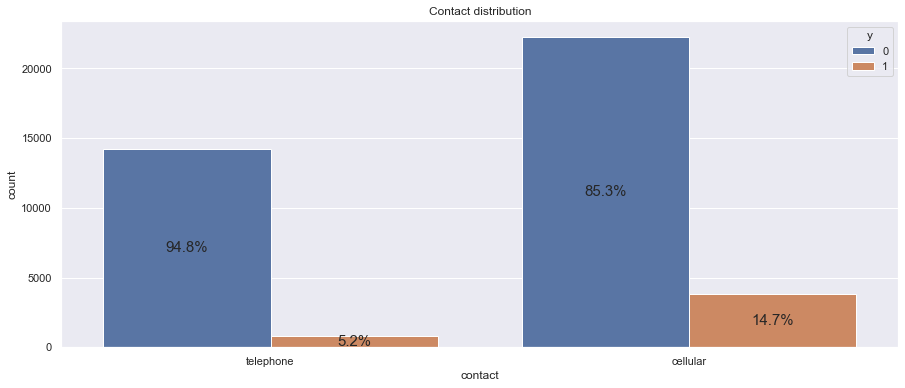

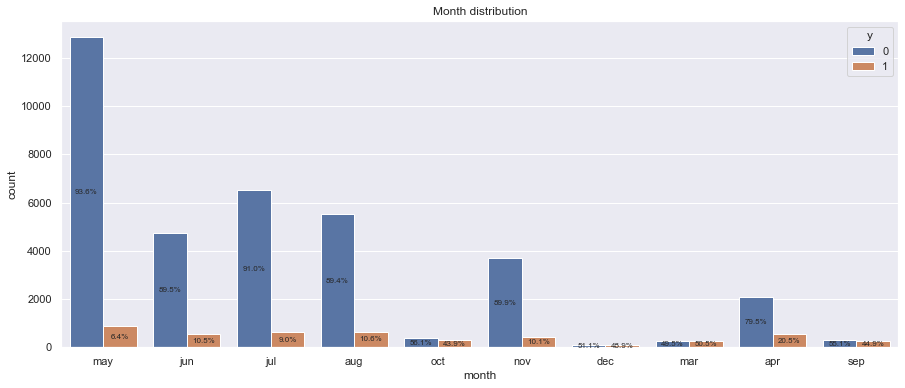

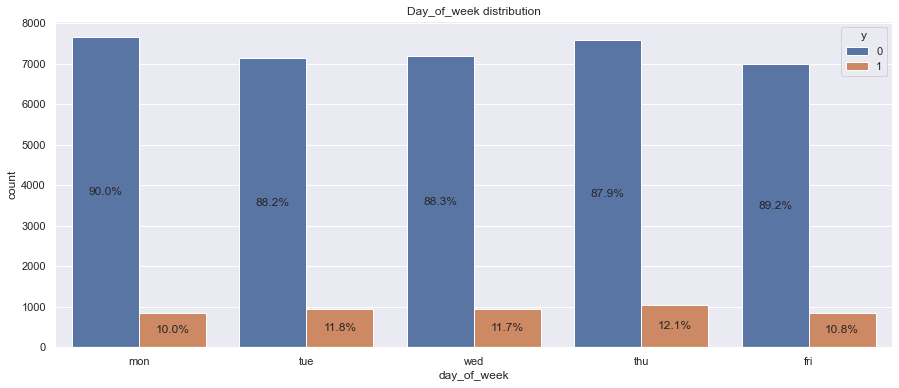

In [14]:
categorical = {'job': 9, 'marital': 15, 'education': 12, 'default': 15, 'housing': 15, 'loan': 15, 'poutcome': 15, 
              'contact': 15, 'month': 8, 'day_of_week': 12}
for cat, fontsize in categorical.items():
    create_countplot(feature=cat, hue='y', fontsize=fontsize, data=bank_data)

* Job: big number of candidates work as admins, blue-collars and technicians, small number of students, housemaids and self-employed
* Marital: most candidates are married
* Education: most candidates have a high school diploma or a university degree
* Default: most candidates don't have default, bun still there is 21 % of unknown values
* Housing: more than 50 % of candidates have a housing loan
* Loan: only 15 % have personnal loan
* Poutcome: 'nonexistent' value is 85 % of all values, so most results are unknown
* Contact: Major communication type is cellular
* Month: only 10 month out of 12 are present in this dataset, Jan and Feb are missing; most contacts were made in May
* Day_of_week: only days Mon-Fri are present; almost unuform distribution

#### Numerical features

In [15]:
def create_hist(feature, minimum=-np.inf, maximum=np.inf):
    plt.style.use('seaborn-deep')
    sns.displot(data=bank_data[(bank_data[feature] >= minimum) & (bank_data[feature] <= maximum)],
                x=feature, hue='y', alpha=0.5, kde=True, height=7.0, aspect=15.0/7.0)
    plt.title('{} distribution'.format(feature.capitalize()))
    plt.show()

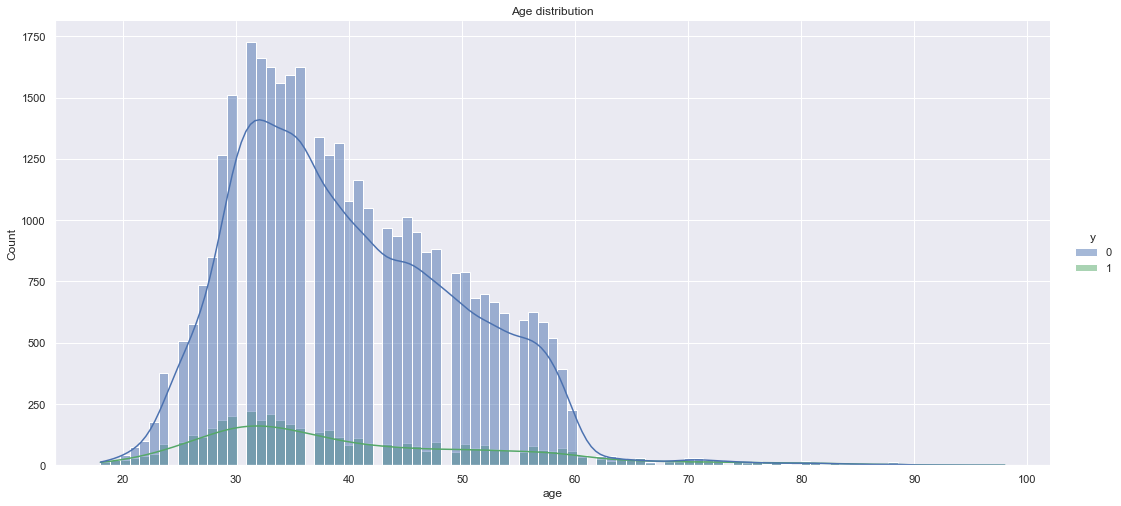

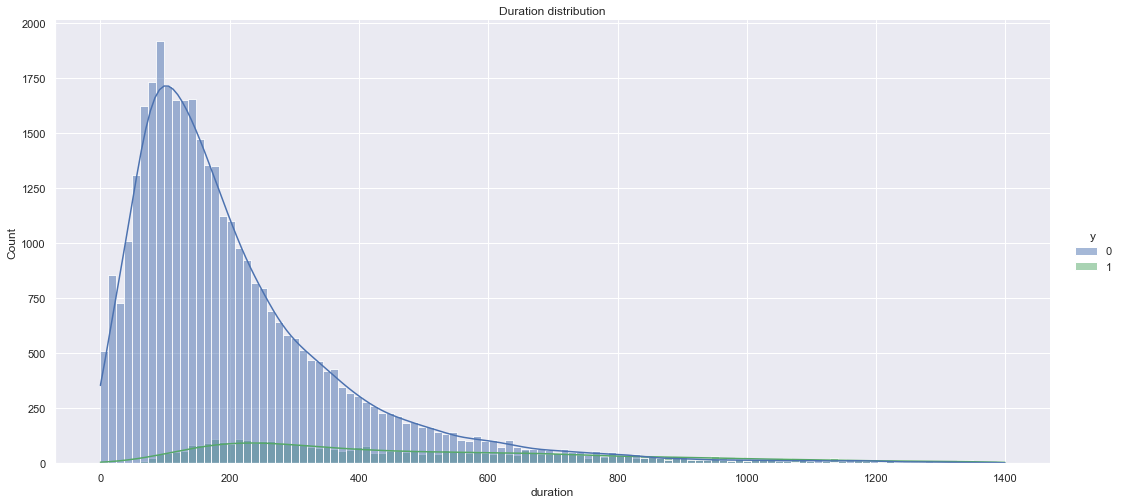

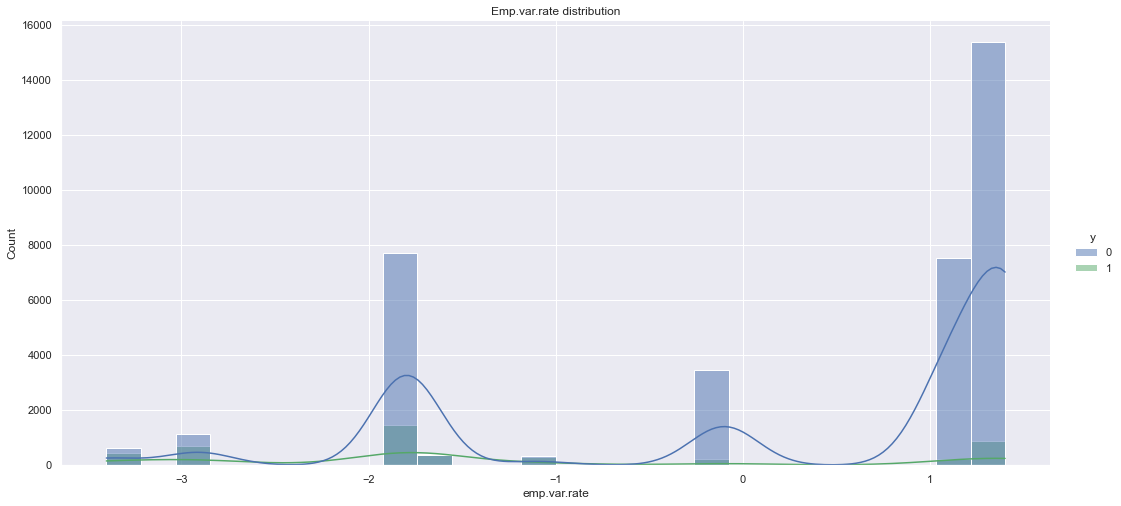

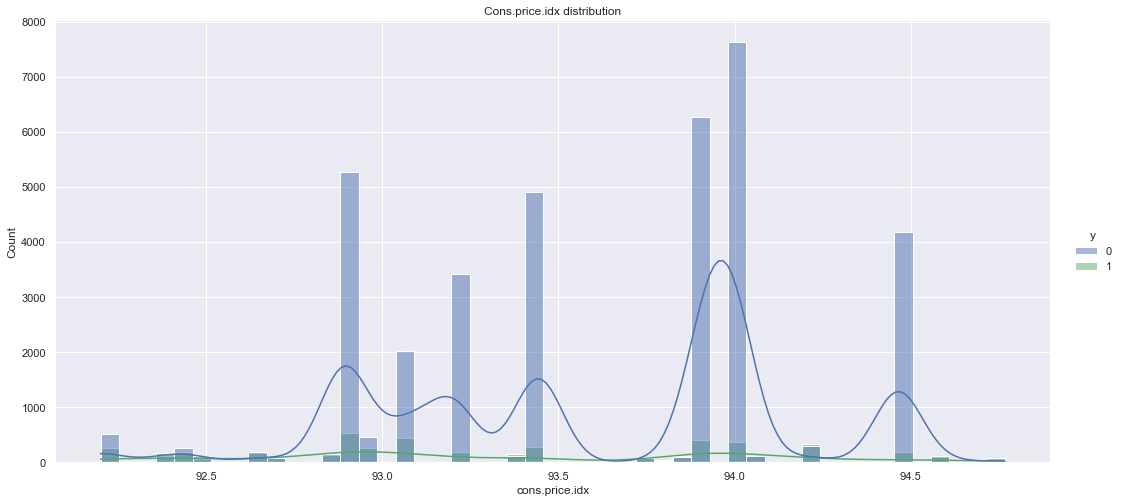

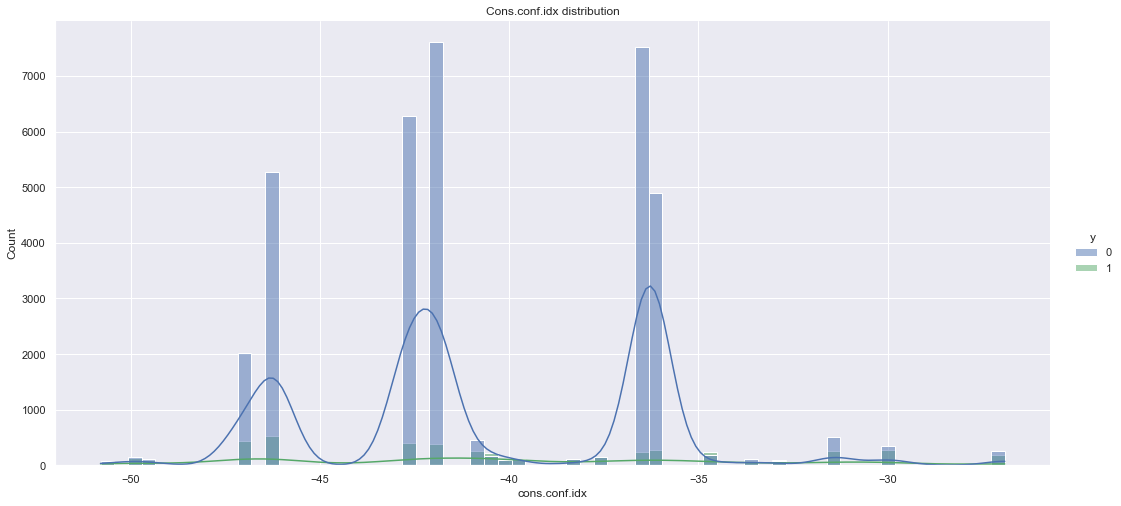

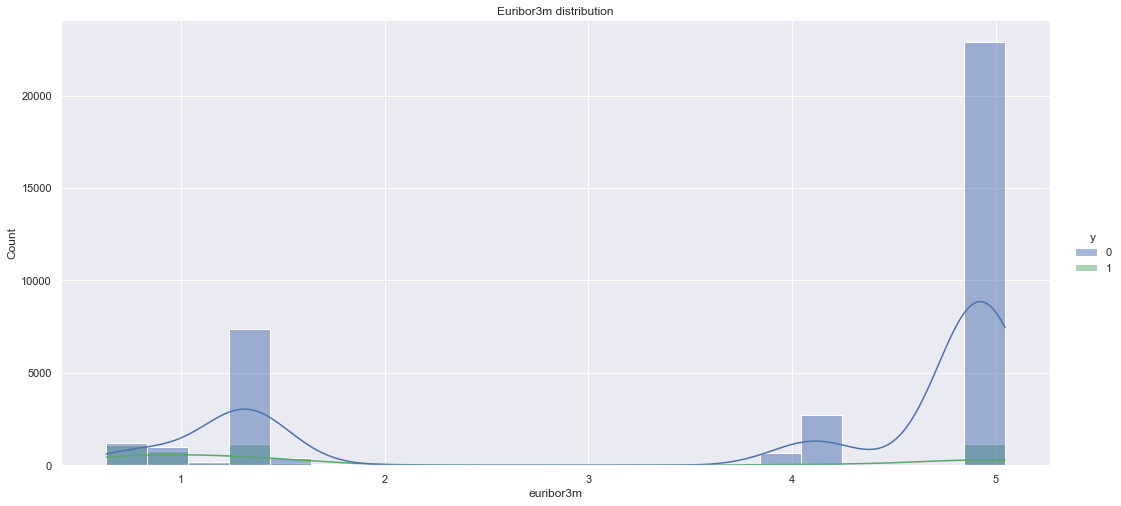

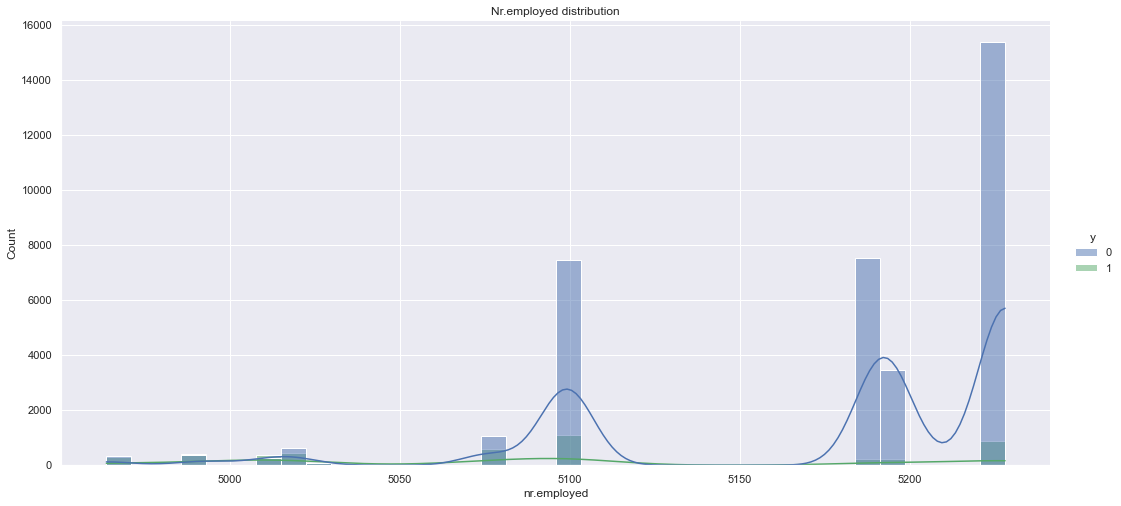

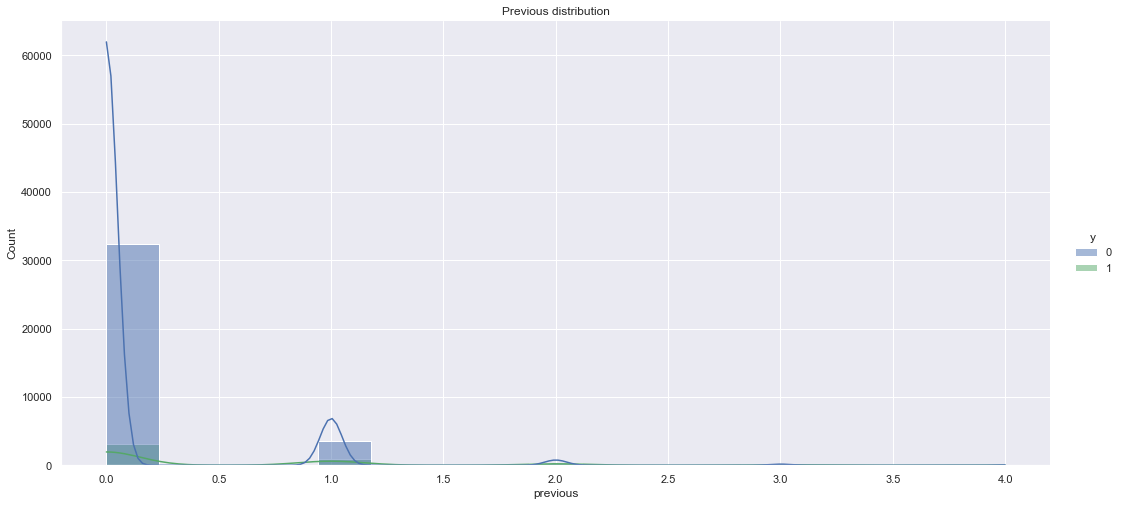

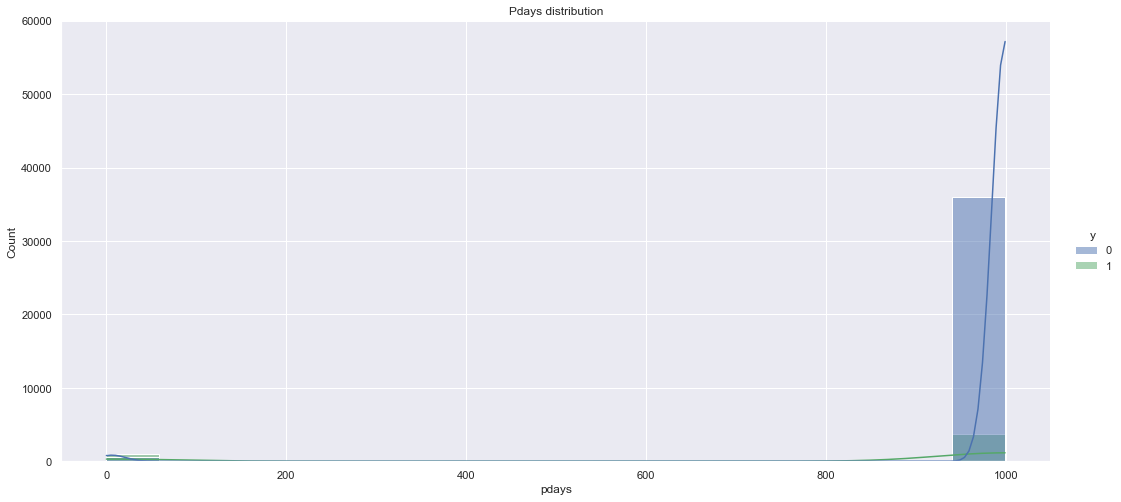

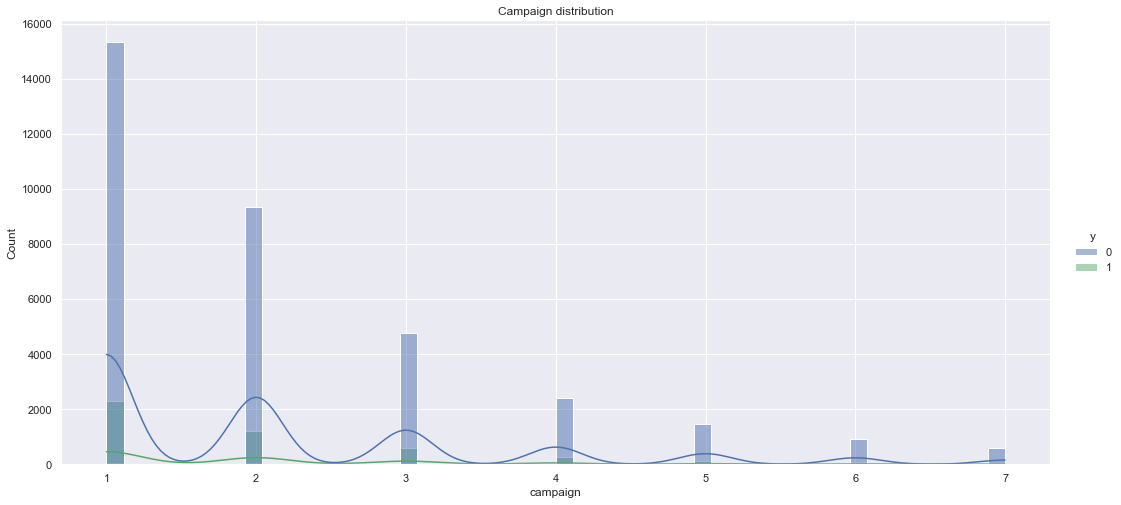

In [16]:
numerical = {'age': (18, 100), 'duration': (0, 1400), 'emp.var.rate': (-np.inf, np.inf), 'cons.price.idx': (-np.inf, np.inf),
            'cons.conf.idx': (-np.inf, np.inf), 'euribor3m': (-np.inf, np.inf), 'nr.employed': (-np.inf, np.inf),
             'previous': (0, 4), 'pdays': (-np.inf, np.inf), 'campaign': (0, 7)}

for num, limits in numerical.items():
    create_hist(num, limits[0], limits[1])

* Age: most customers are between 20 and 60
* Duration: distribution for y=0 reminds Pareto distribution, which seems adequate
* CPI: all CPI values in this dataset are less than 100, so it says that prices become smaller over some time period
* CCI: all CCI values are negative, which seems strange and shows some problems in economy
* Previous: I can guess that 'previous' feature implies idea: the more contacts made, the better chances to get positive answer

### Values over time

* Let's create timeseries month feature

In [17]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

def create_ts_month(data):
    months = ['may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr']
    i = 0
    
    idx = data.index[data['month'] == 'apr'][0] - 1
    first = data.loc[:idx]
    for month in months:
        if len(first[first['month'] == month]):
            first.loc[first['month'] == month, 'ts_month'] = i
            i += 1
    
    months = ['apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar']
    data = data.loc[idx + 1:]
    idx = data.index[(data['month'] == 'mar')][0] - 1
    second = data.loc[:idx]
    for month in months:
        if len(second[second['month'] == month]):
            second.loc[second['month'] == month, 'ts_month'] = i
            i += 1
            
    months = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov']
    third = data.loc[idx + 1:]
    for month in months:
        if len(third[third['month'] == month]):
            third.loc[third['month'] == month, 'ts_month'] = i
            i += 1
            
    return pd.concat([first, second, third], ignore_index=True)
    
    
bank_data = create_ts_month(bank_data)
bank_data.ts_month = bank_data.ts_month.astype('int8')
bank_data.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,ts_month
7086,36,admin.,married,high.school,0,0,0,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0,0
36809,57,management,married,unknown,0,0,0,cellular,jun,mon,...,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,1,10
26014,42,management,married,university.degree,unknown,1,0,cellular,nov,wed,...,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0,5
31769,35,admin.,single,high.school,0,1,1,cellular,may,thu,...,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0,9
13487,27,admin.,married,high.school,0,0,0,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0,2
28525,23,student,single,basic.4y,0,1,0,cellular,apr,wed,...,999,0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,0,8
11279,45,technician,married,university.degree,0,0,0,telephone,jun,thu,...,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,1
29862,24,technician,single,professional.course,0,1,0,cellular,apr,mon,...,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,0,8
9497,50,blue-collar,single,basic.9y,unknown,0,0,telephone,jun,mon,...,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,1
382,34,management,single,university.degree,0,0,0,telephone,may,tue,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


* Total deposits each month

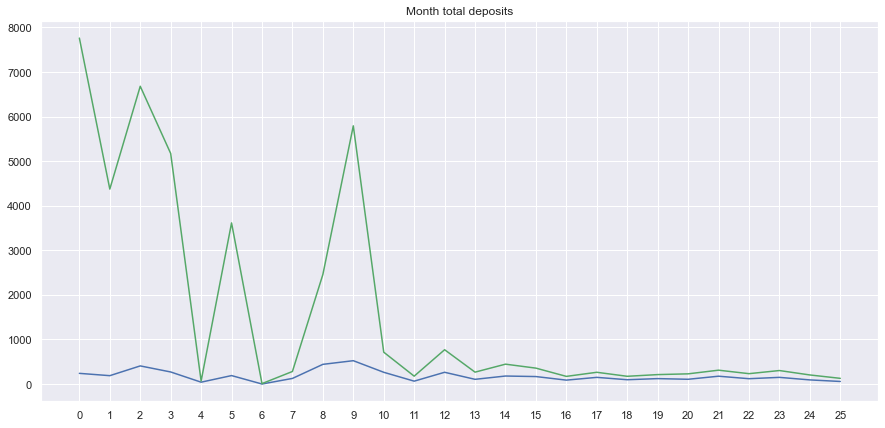

In [33]:
fig = plt.figure(figsize=(15, 7))
plt.plot(bank_data.groupby(['ts_month'])['y'].sum())
plt.plot(bank_data.groupby(['ts_month'])['y'].count())
plt.xticks(np.arange(26))
plt.title('Month total deposits')
plt.show()

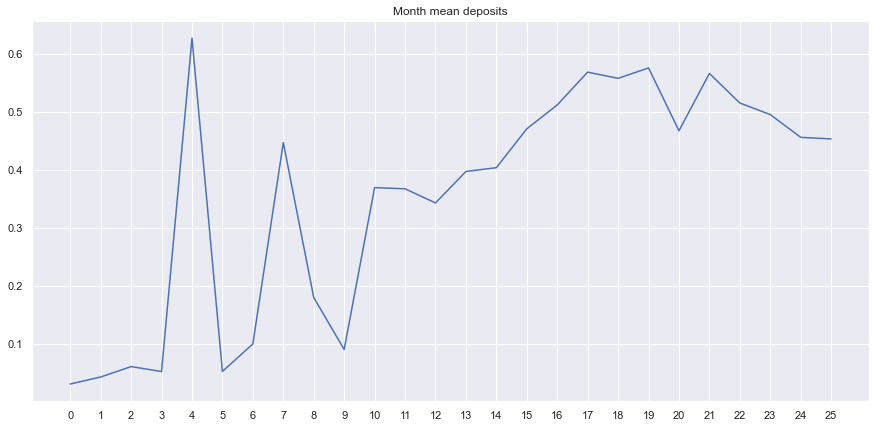

In [19]:
fig = plt.figure(figsize=(15, 7))
plt.plot(bank_data.groupby(['ts_month'])['y'].mean())
plt.xticks(np.arange(26))
plt.title('Month mean deposits')
plt.show()

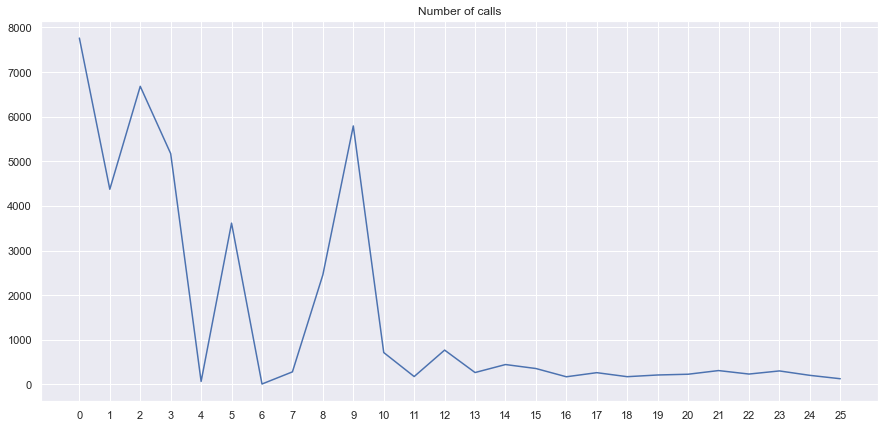

In [20]:
fig = plt.figure(figsize=(15, 7))
plt.plot(bank_data.groupby(['ts_month'])['y'].count())
plt.xticks(np.arange(26))
plt.title('Number of calls')
plt.show()

* As we can see number of calls decreased drasticaly over time, nevertheless deposit average rate per person increased

* Let's see the changes in CPI over time

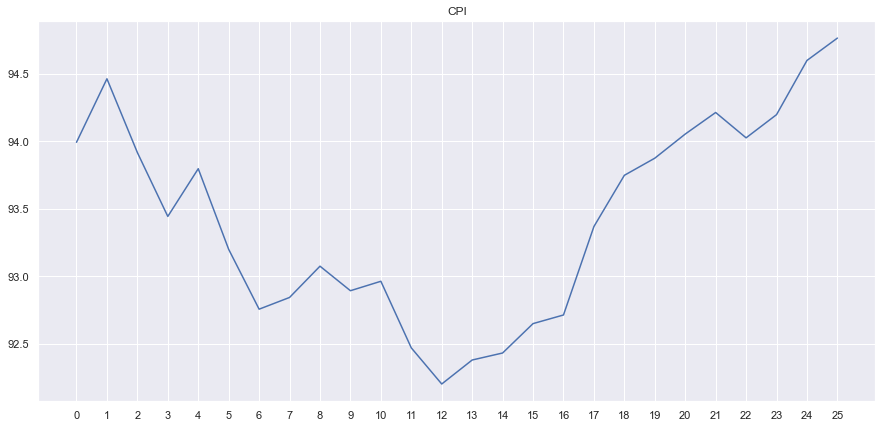

In [21]:
fig = plt.figure(figsize=(15, 7))
plt.plot(bank_data.groupby(['ts_month'])['cons.price.idx'].mean())
plt.xticks(np.arange(26))
plt.title('CPI')
plt.show()

* As we can see CPI is always less than 100, so prices became smaller comparing to period in the past

* Let's see the changes in CСI over time

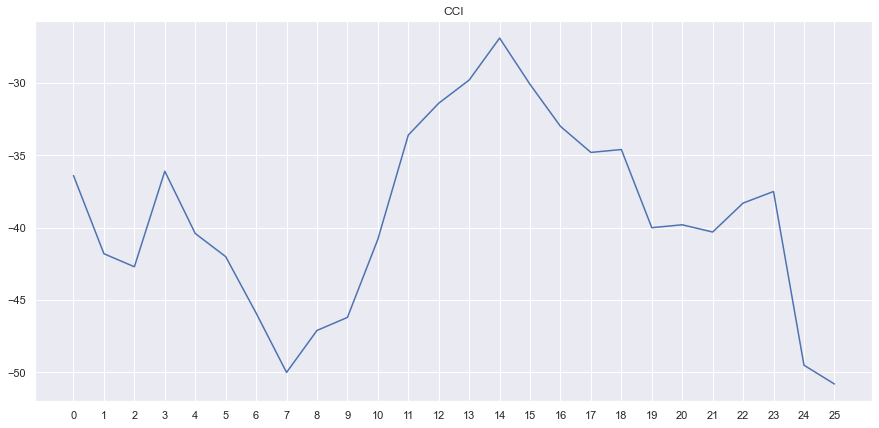

In [22]:
fig = plt.figure(figsize=(15, 7))
plt.plot(bank_data.groupby(['ts_month'])['cons.conf.idx'].mean())
plt.xticks(np.arange(26))
plt.title('CCI')
plt.show()

* Almost oppsite to CPI, so it makes sense

* Let's see the changes in the Euro InterBank Offered Rate 'euribor3m' over time

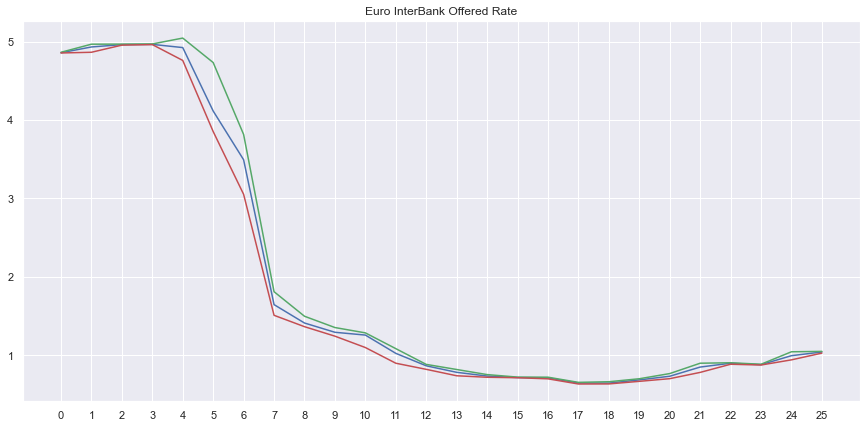

In [23]:
fig = plt.figure(figsize=(15, 7))
plt.plot(bank_data.groupby(['ts_month'])['euribor3m'].mean())
plt.plot(bank_data.groupby(['ts_month'])['euribor3m'].max())
plt.plot(bank_data.groupby(['ts_month'])['euribor3m'].min())
plt.xticks(np.arange(26))
plt.title('Euro InterBank Offered Rate')
plt.show()

* A 'loan rate' between European banks became smaller, so it means money became 'cheaper'

* Let's see the changes in number of employees over time

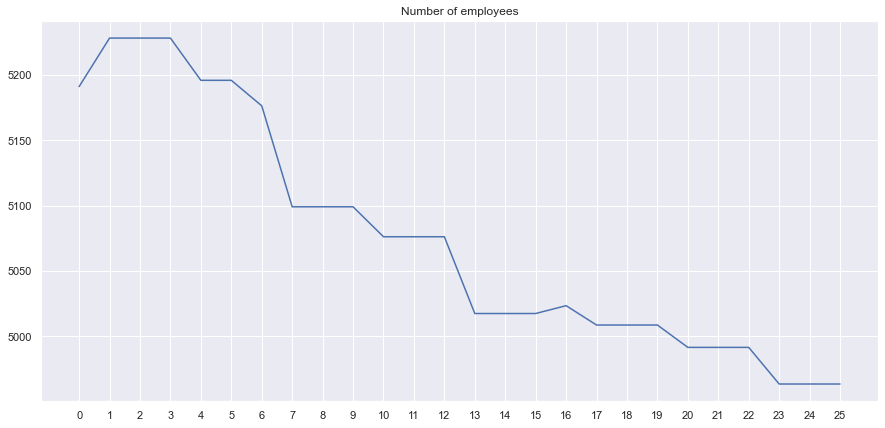

In [24]:
fig = plt.figure(figsize=(15, 7))
plt.plot(bank_data.groupby(['ts_month'])['nr.employed'].mean())
plt.xticks(np.arange(26))
plt.title('Number of employees')
plt.show()

* Number of employees was decreasing over time

### Outliers

In [25]:
def create_boxplot(feature):
    sns.boxplot(x=bank_data[feature])
    plt.title('{} boxplot'.format(feature.capitalize()))
    plt.show()

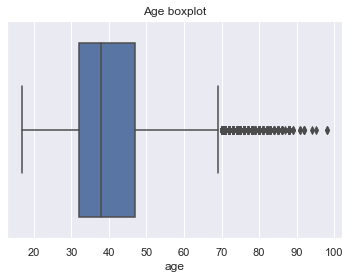

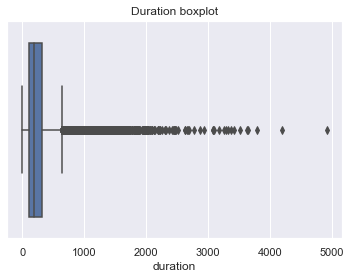

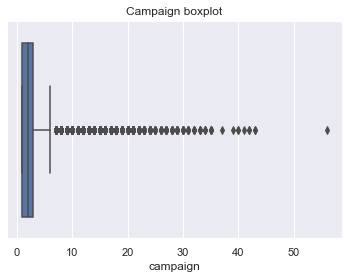

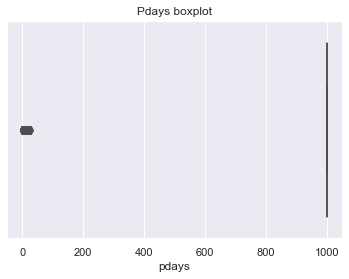

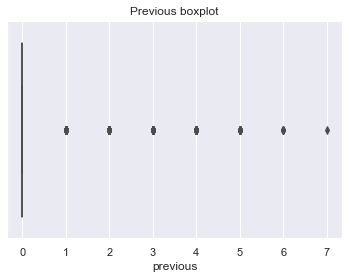

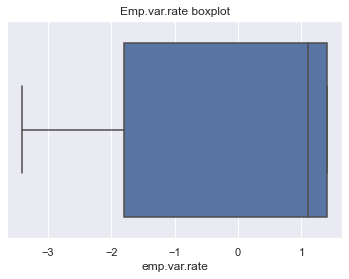

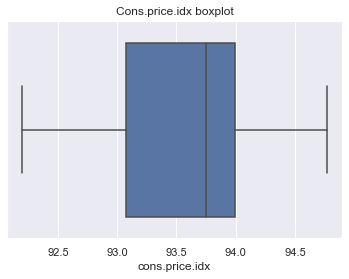

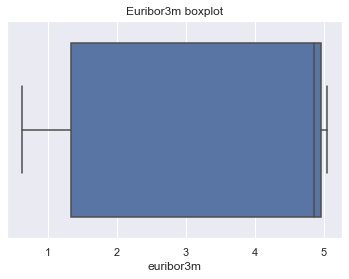

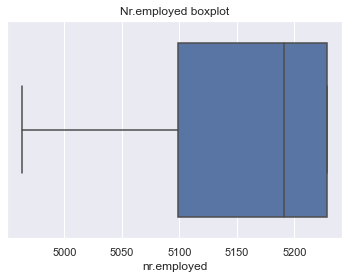

In [26]:
numeric = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
for feature in numeric:
    create_boxplot(feature)

### Correlations

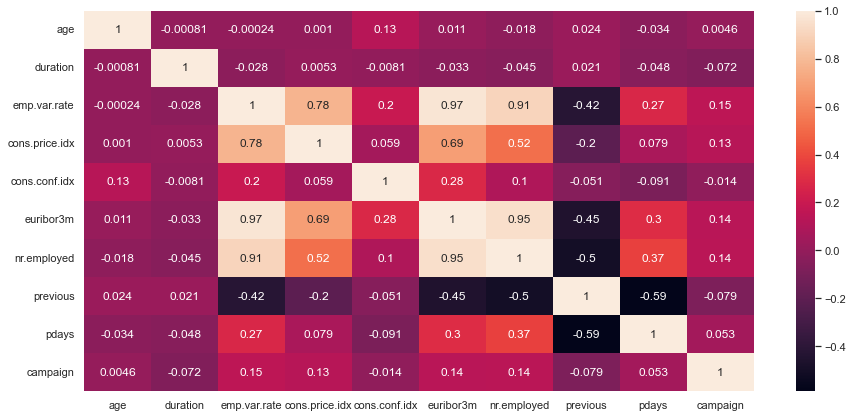

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(bank_data[numerical.keys()].corr(), annot=True)
plt.show()

* There are several correlation values close to 1 between some economical features such as EVR, Euribor and NE

#### Save dataset

In [28]:
bank_data.to_csv('../data/bank_data.csv', index=False)
print('Success!')

Success!


### Summary

* No missing values, but 'unknown' values are present in dataset
* 12 duplicates were removed
* 'no' is prevailed value in target feature 'y'
* The data is highly imbalanced. Number of calls decreased drasticaly over time, deposit average increased. This means that target variable ration differs over time (~ 90/10 at the beginning, ~ 50/50 at the end)